## 252 - Blackbody Radiation and the Plank Function

[Youtube](https://www.youtube.com/watch?v=FdGfPX43gBM)

$B_{\lambda}(T) = \cfrac{c_1 \lambda^{-5}}{\pi(e^{\frac{c_2}{\lambda T}} -1)}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from metpy.units import units

In [2]:
def blackbody_radiation(temperature, wmin = 0.01 * units.micron, wmax = 2 * units.micron, nsteps = 100):
 c1 = 3.74e-16 * units('W m^2')
 c2 = 1.45e-2 * units('m K')
 wmax = wmax.to(wmin.units)
 wavelength = np.linspace(wmin.m, wmax.m, nsteps) * wmin.units
 radiation = (c1 * wavelength ** -5) / (np.pi * (np.e ** (c2 / (wavelength * temperature)) - 1))
 return wavelength, radiation

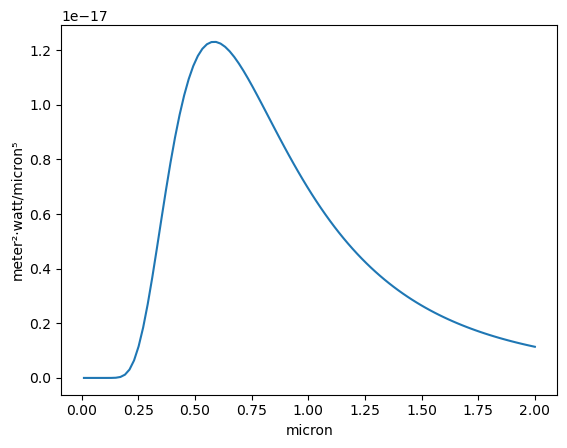

In [3]:
w, r = blackbody_radiation(5000 * units.kelvin)
plt.plot(w, r)

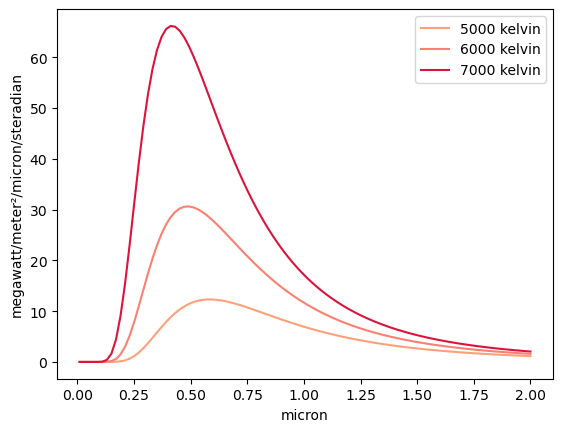

In [4]:
fig, ax = plt.subplots()
for t, c in zip(np.array([5000, 6000, 7000]) * units.kelvin, ['lightsalmon', 'salmon', 'crimson']):
 w, r = blackbody_radiation(t)
 r = r.to('MW m^-2 micron^-1 steradian^-1')
 ax.plot(w, r, label = t, color = c)
plt.legend()

Text(0, 0.5, 'Normalized Radiation')

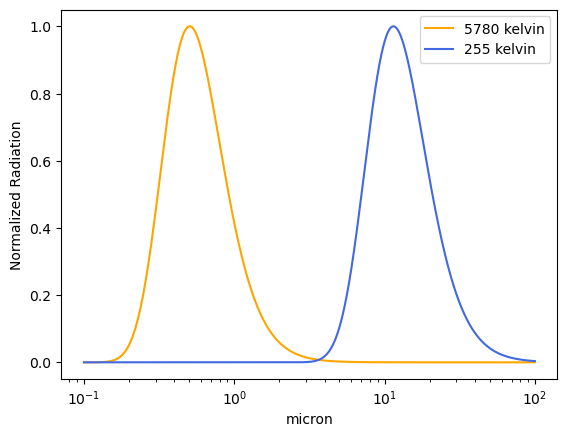

In [5]:
fig, ax = plt.subplots()
for t, c in zip(np.array([5780, 255]) * units.kelvin, ['orange', 'royalblue']):
 w, r = blackbody_radiation(t, wmin = 0.1 * units.micron, wmax = 100 * units.micron, nsteps = 10000)
 r = r.to('MW m^-2 micron^-1 steradian^-1')
 ax.plot(w, r/np.max(r), label = t, color = c)
plt.legend()
ax.set_xscale('log')
ax.set_ylabel('Normalized Radiation')